## About Dataset:

# Global Power Plant Database
### Problem Statement:
Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5] 

country_long (text): longer form of the country designation 
name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant 

capacity_mw (number): electrical generating capacity in megawatts 

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) 

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export 

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form 

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information 

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported 

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 

generation_data_source (text): attribution for the reported generation information 

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013(text): label of the model/method used to estimate generation for the year 

2013estimated_generation_note_2014(text): label of the model/method used to estimate generation for the year

2014estimated_generation_note_2015(text): label of the model/method used to estimate generation for the year

2015estimated_generation_note_2016(text): label of the model/method used to estimate generation for the year

2016estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction :
Make two prediction 1) Primary Fuel 2) capacity_mw

## Exploring Data

In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")

In [37]:
df= pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 2\Global Power Plant\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# checking shape of dataset
df.shape

(907, 27)

In [39]:
# from above information we have clear idea of the shape of our dataset.
# now lets check the data type of diffrent column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [40]:
# now we have clear idea of datatype of diffrent column
# above table also give info about null values and it seem there are quiet a lot of null values
# lets check our dataset for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [41]:
# This clears that there is no null values present in our dataset.
# Now lets check the unique value each column contains.
for i in df.columns:
    print(i,':',len(df[i].unique()))

country : 1
country_long : 1
name : 907
gppd_idnr : 907
capacity_mw : 361
latitude : 837
longitude : 828
primary_fuel : 8
other_fuel1 : 4
other_fuel2 : 2
other_fuel3 : 1
commissioning_year : 74
owner : 281
source : 191
url : 304
geolocation_source : 4
wepp_id : 1
year_of_capacity_data : 2
generation_gwh_2013 : 1
generation_gwh_2014 : 372
generation_gwh_2015 : 397
generation_gwh_2016 : 404
generation_gwh_2017 : 409
generation_gwh_2018 : 411
generation_gwh_2019 : 1
generation_data_source : 2
estimated_generation_gwh : 1


## Feature Selection

In [42]:
# Checking the count of the country
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [43]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [44]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [45]:
df['wepp_id'].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [46]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [47]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh","estimated_generation_gwh"],axis=1,inplace=True)

In [48]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape

(907, 19)

In [50]:
# Checking the count of name
df['name'].value_counts()


PORINGALKUTTU L           1
SANTALDIH                 1
Lalpur Wind Farm          1
KHANDONG                  1
MONARCHAK CCPP            1
                         ..
MRMPL Mudari Wind Farm    1
BAKRESWAR                 1
Abhijeet                  1
Devgarh Wind Farm         1
MUKERIAN I -IV            1
Name: name, Length: 907, dtype: int64

In [51]:
 #Name column has unique names for each power plant so we can drop this column.

# Dropping name column
df.drop("name",axis=1,inplace=True)

In [52]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

IND0000021    1
WRI1026660    1
IND0000108    1
WRI1026675    1
WRI1026105    1
             ..
WRI1026086    1
IND0000267    1
WRI1026680    1
IND0000055    1
IND0000037    1
Name: gppd_idnr, Length: 907, dtype: int64

In [53]:
# The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

df.drop("gppd_idnr",axis=1,inplace=True)

In [54]:
# Checking the count of gppd_idnr
df["owner"].value_counts()

Jk Cement ltd                    4
Sterling Agro Industries ltd.    4
Acc Acc ltd                      4
SWPPL                            3
Powerica Limited                 3
                                ..
Karur Textile Park limited       1
Mahatma Power ltd                1
Hothur Pvt ltd                   1
LNJ Power Ventures Limited       1
Daund Sugar ltd                  1
Name: owner, Length: 280, dtype: int64

In [55]:
# The column owner has more than 65% null values. so we can drop this column as it is irrelevant.

df.drop("owner",axis=1,inplace=True)

In [56]:
# We can drop the column url also, as its of no relevance.

df.drop("url",axis=1,inplace=True)


In [57]:
df.shape

(907, 15)

##  Missing Values

In [58]:
# Checking for null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [60]:
# it still contain some columns which ,ostly contain null values so we'll drop them
# Dropping irrelevant columns
df.drop(columns=["generation_gwh_2013","generation_gwh_2019"],axis=1,inplace=True)

In [61]:
# Checking for null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

### Visualizing null values using heatmap

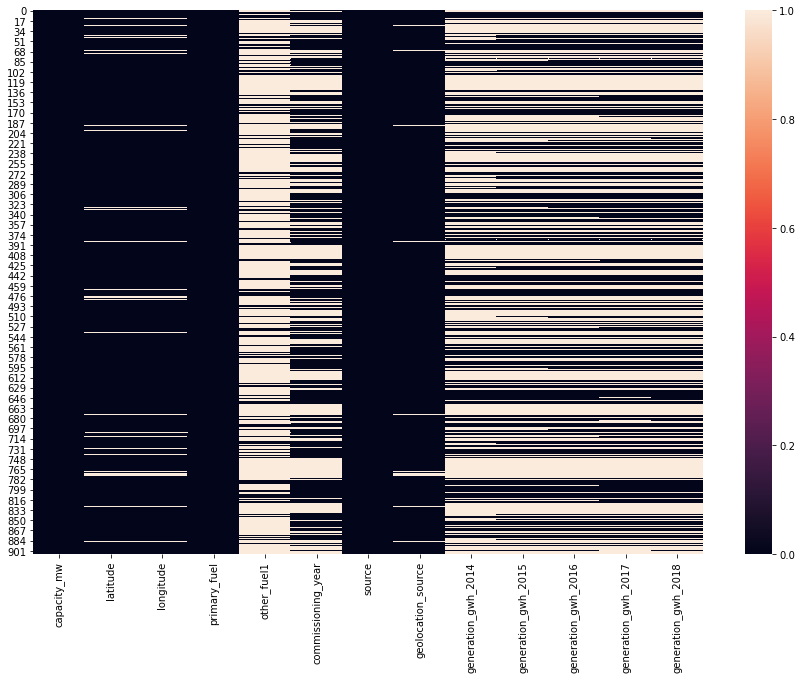

In [62]:
# Checking for missing data using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [63]:
# Ckecking skewness before handling missing data
df.skew()


capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [64]:
# Filling null values using their median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [65]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())

In [66]:
# let's check the mode of other_fuel1 
df["other_fuel1"].mode()  # we will fill the null values using its mode

0    Oil
dtype: object

In [67]:
# let's check the mode of geolocation_source columns
df["geolocation_source"].mode()  # we will fill the null values using its mode

0    WRI
dtype: object

In [68]:
# Replacing the null valuee by its mode Oil
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

# Filling null values by its mode WRI
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

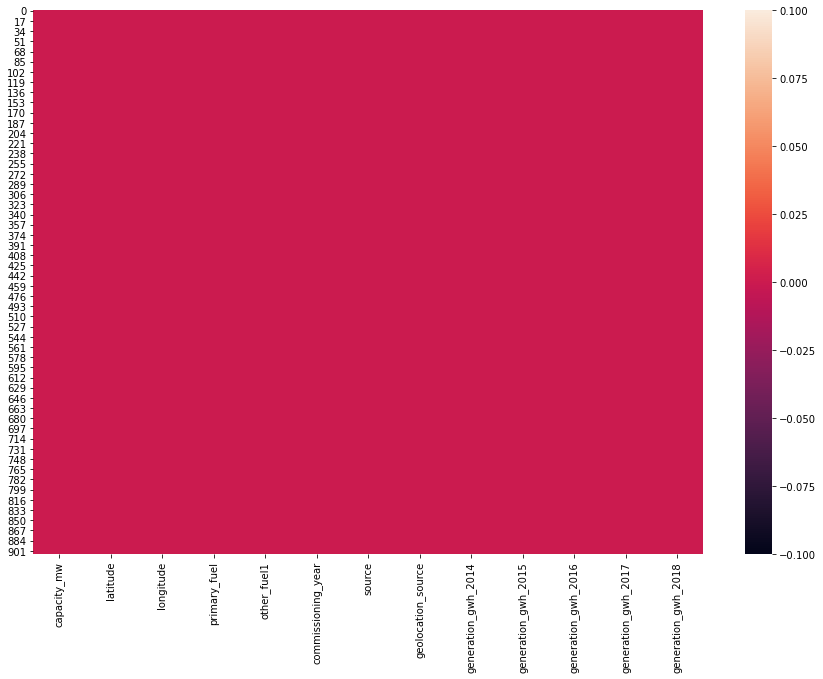

In [69]:
# Checking for missing data using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [70]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [71]:
# Checking the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [72]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [73]:
# Checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [74]:
# Checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [75]:
# Checking the list of values of Commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [76]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)


In [77]:
# Lets check th dataframe after feature engineering
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [78]:
# Checking whether the datset contains any space
df.loc[df['capacity_mw']== " "]


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


In [79]:
# Statistical summary of dataset
df.describe()


,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


### Observations



This gives the statistical information of the dataset. The summary of this dataset looks perfect as there is no negative/invalid values present.\ From the above description we can observe the following things.

1) The counts of the columns are same which means there are no missing values present in the dataset.

2) The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

3) The median is bit greater than the mean in the column latitude which means it is skewed to left.

4) From the difference between the max and 75% percentile we can say that there are huge outliers present in most of the columns, will remove them before model building.

5) The minimum count of the Power plant capacity is zero and maximum is 4760 and there is huge difference in mean and std.

##### Seperating nemeric and categorical data


In [80]:
# Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [81]:
# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


## Data Visualization

#### Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


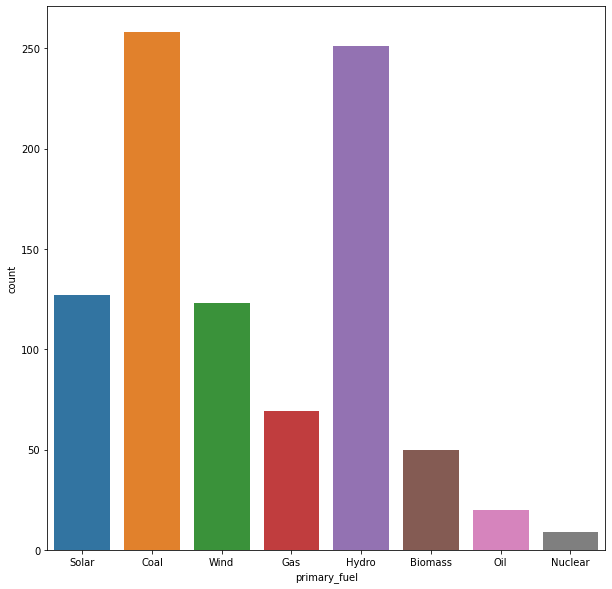

In [83]:
# Visualizing the types of fuel in primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['primary_fuel'])
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


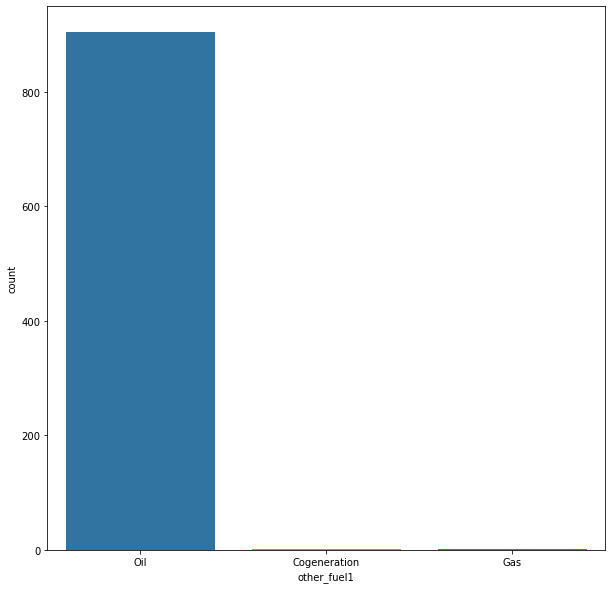

In [84]:
# Visualizing the types of fuel in other_fuel1
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['other_fuel1'])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


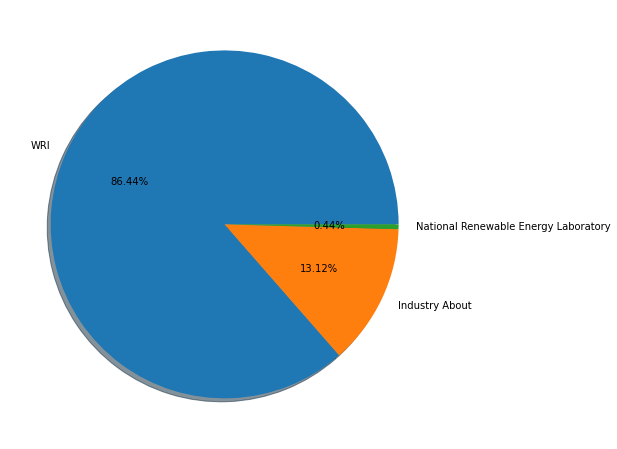

In [85]:
# Visualizing the counts of geolocation_source
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

### Distribution of Skewness

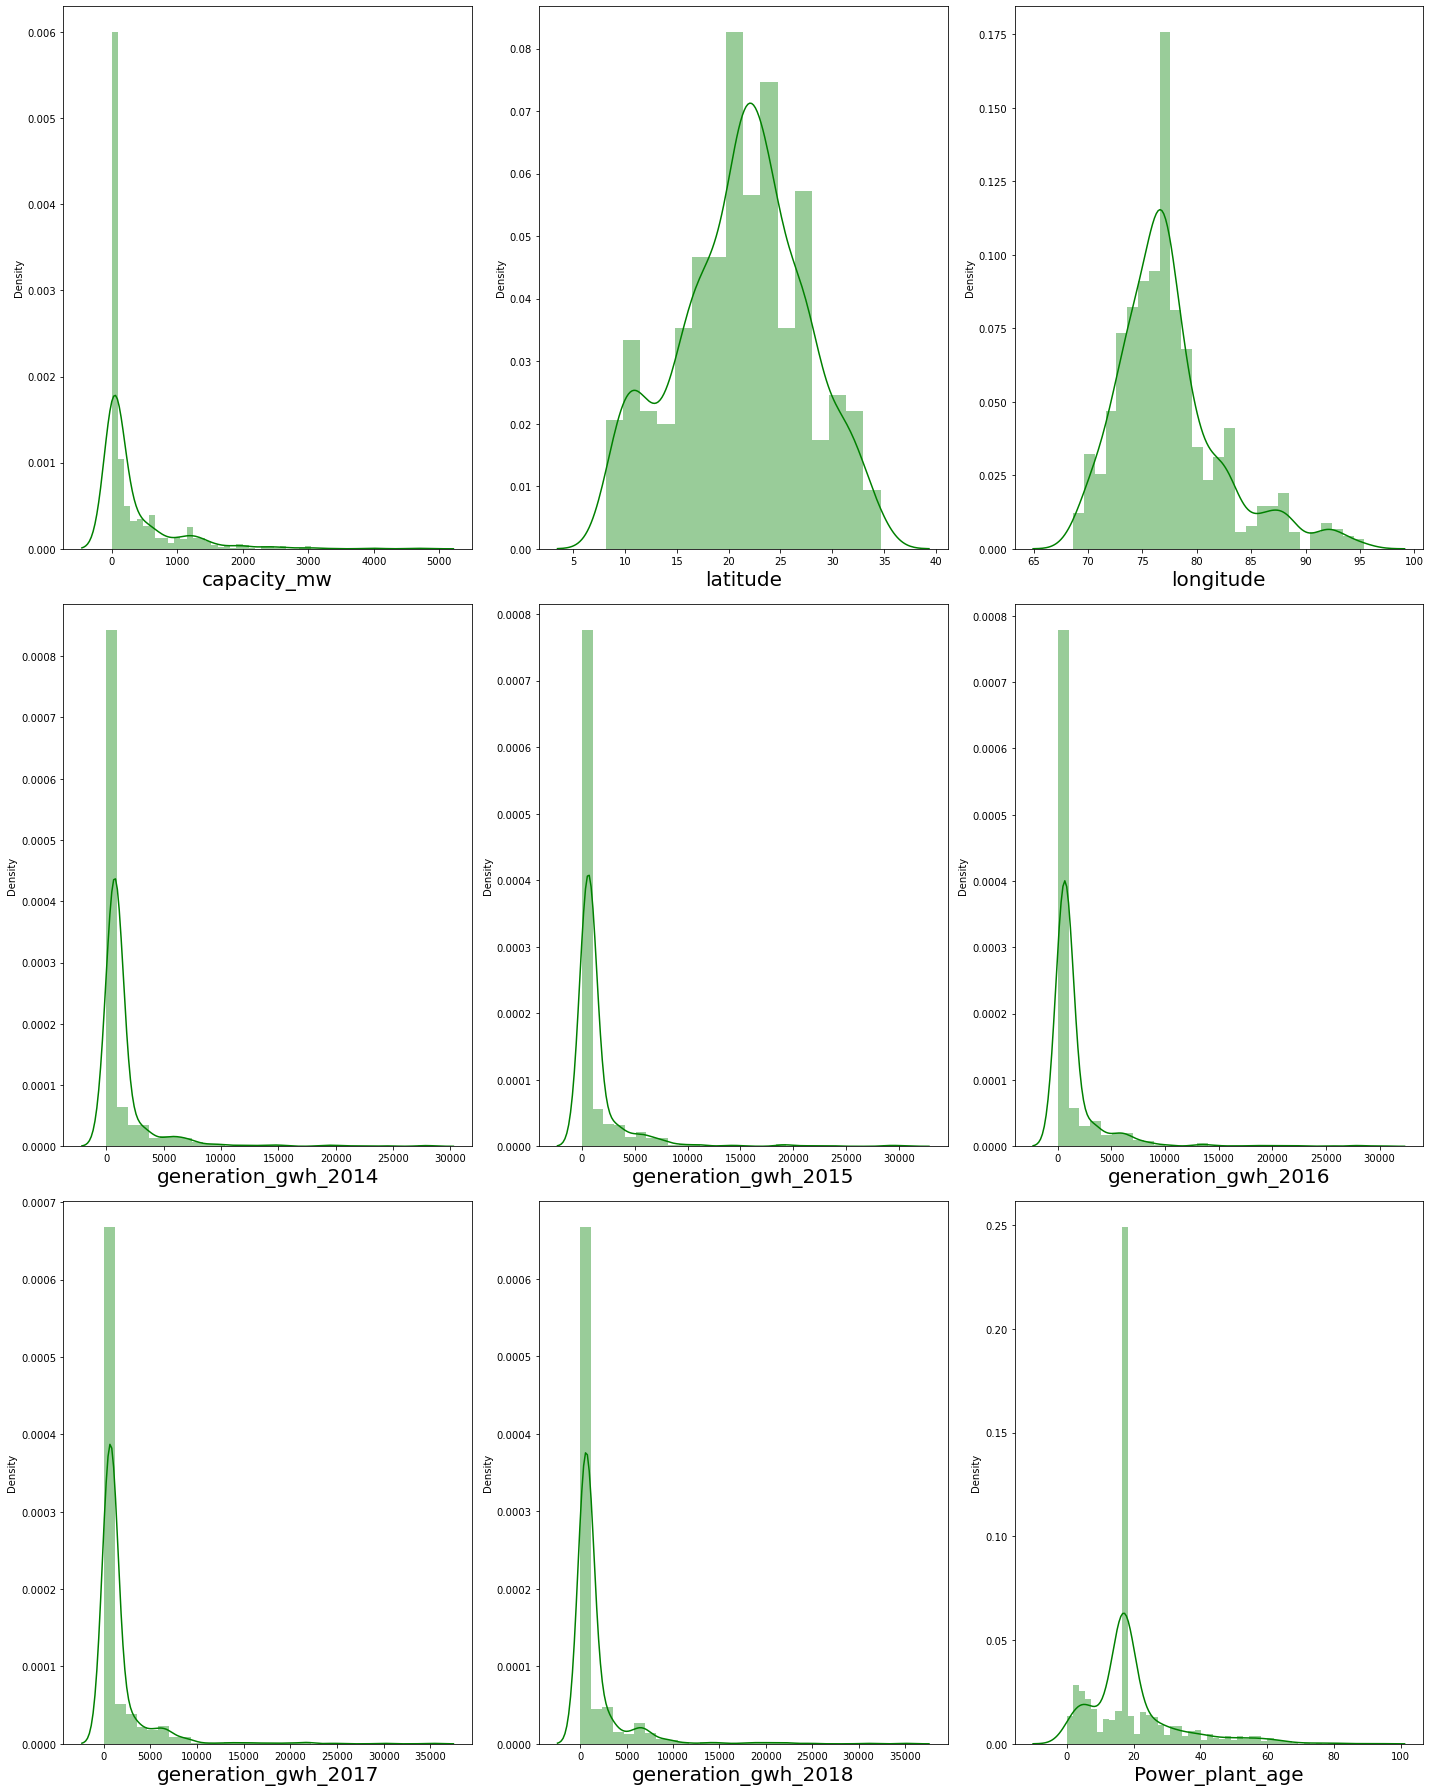

In [86]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

##### Comparing target variable capacity_mw with features

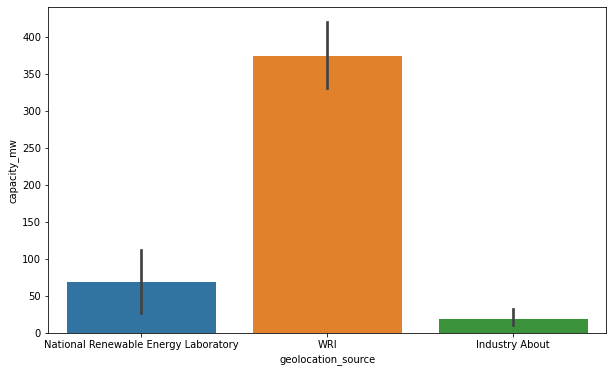

In [88]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

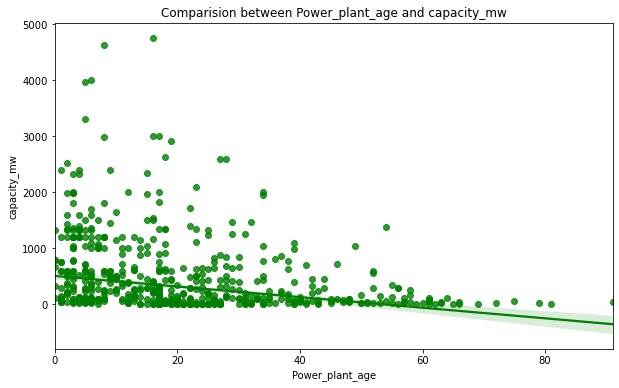

In [89]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

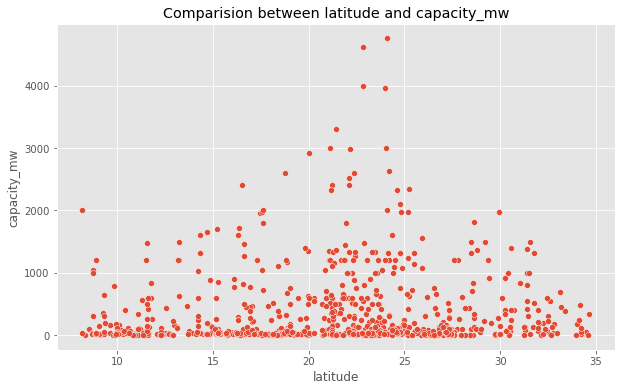

In [90]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

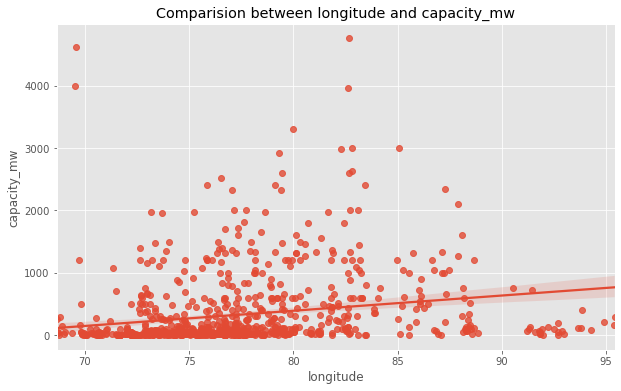

In [91]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"])


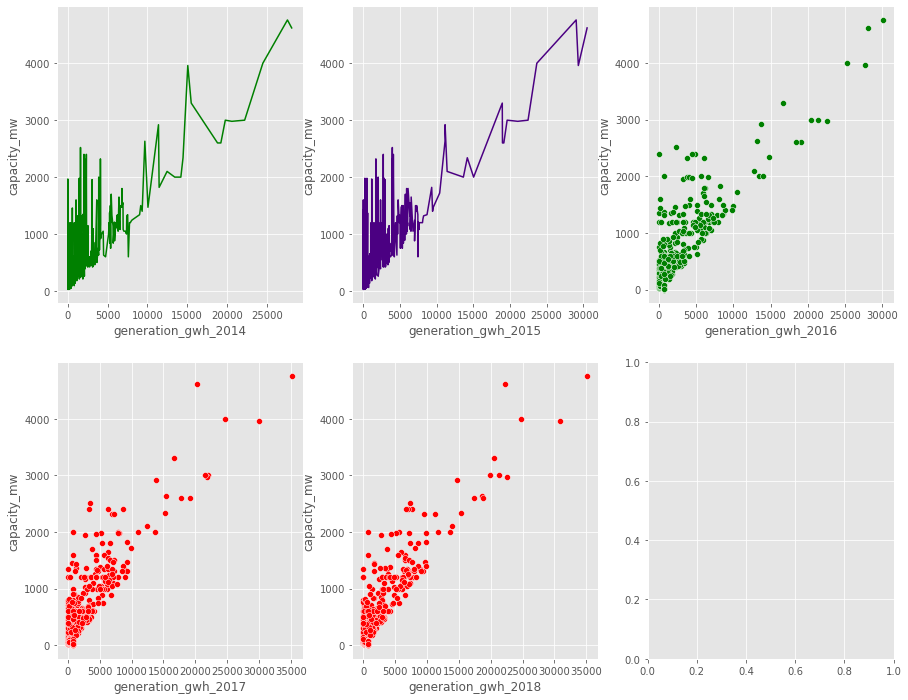

In [99]:
fig,axes=plt.subplots(2,3,figsize=(15,12))

# Checking generation growth in 2014
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,2],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="r")

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()


#### Comparing target variable Primary_fuel with other features

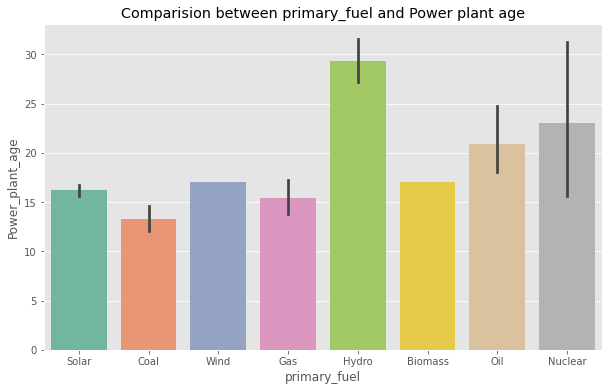

In [100]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='primary_fuel', ylabel='latitude'>

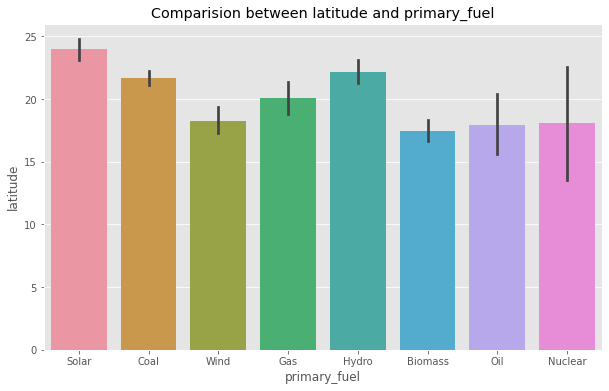

In [101]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"])

<AxesSubplot:title={'center':'Comparision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

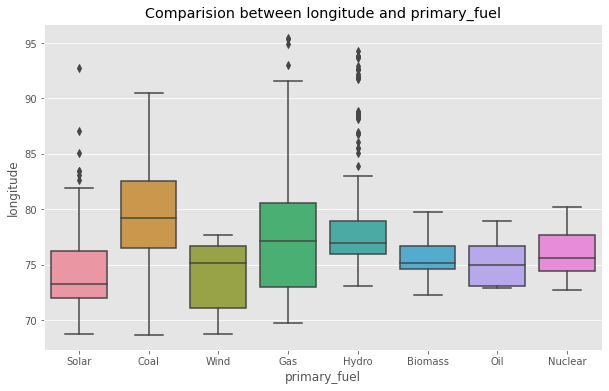

In [102]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'],df["longitude"])

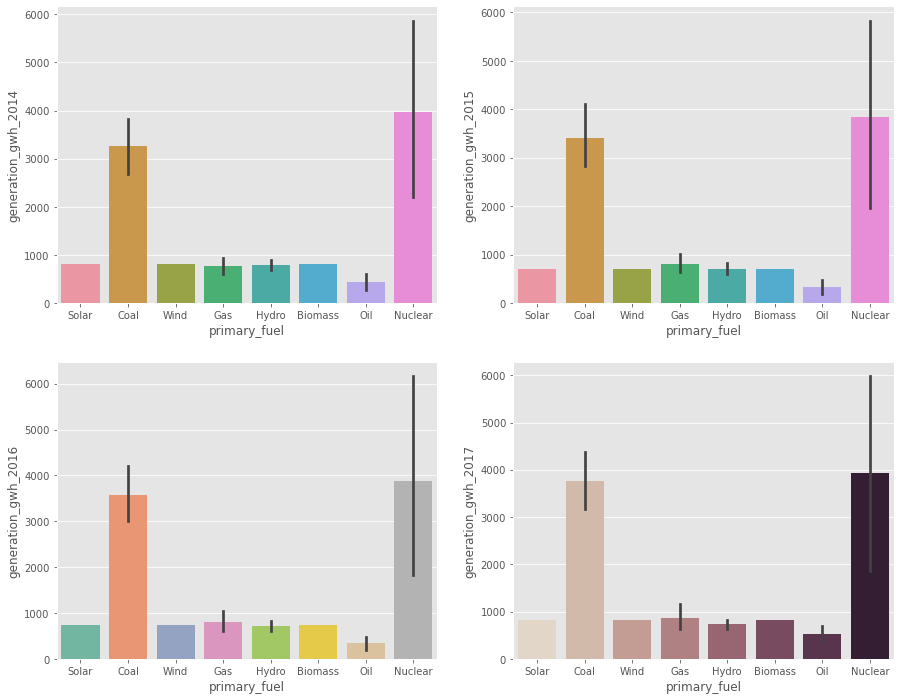

In [103]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

#### Relationship between targets

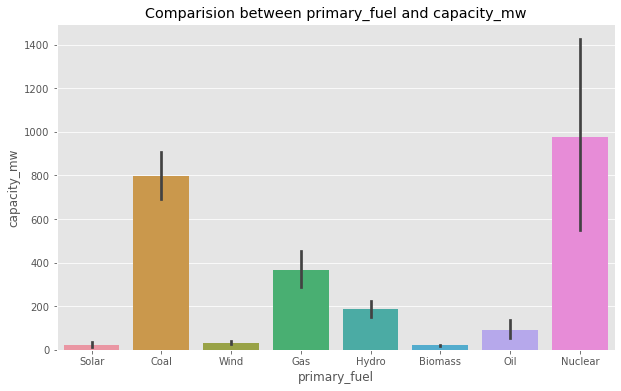

In [104]:
#Lets check the relation between primary_fuel and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

## Multivariate Analysis
Since we have two target variables capacity_mw and primary_fuel, we will check the pairwise relation for the features with both the targets separately.

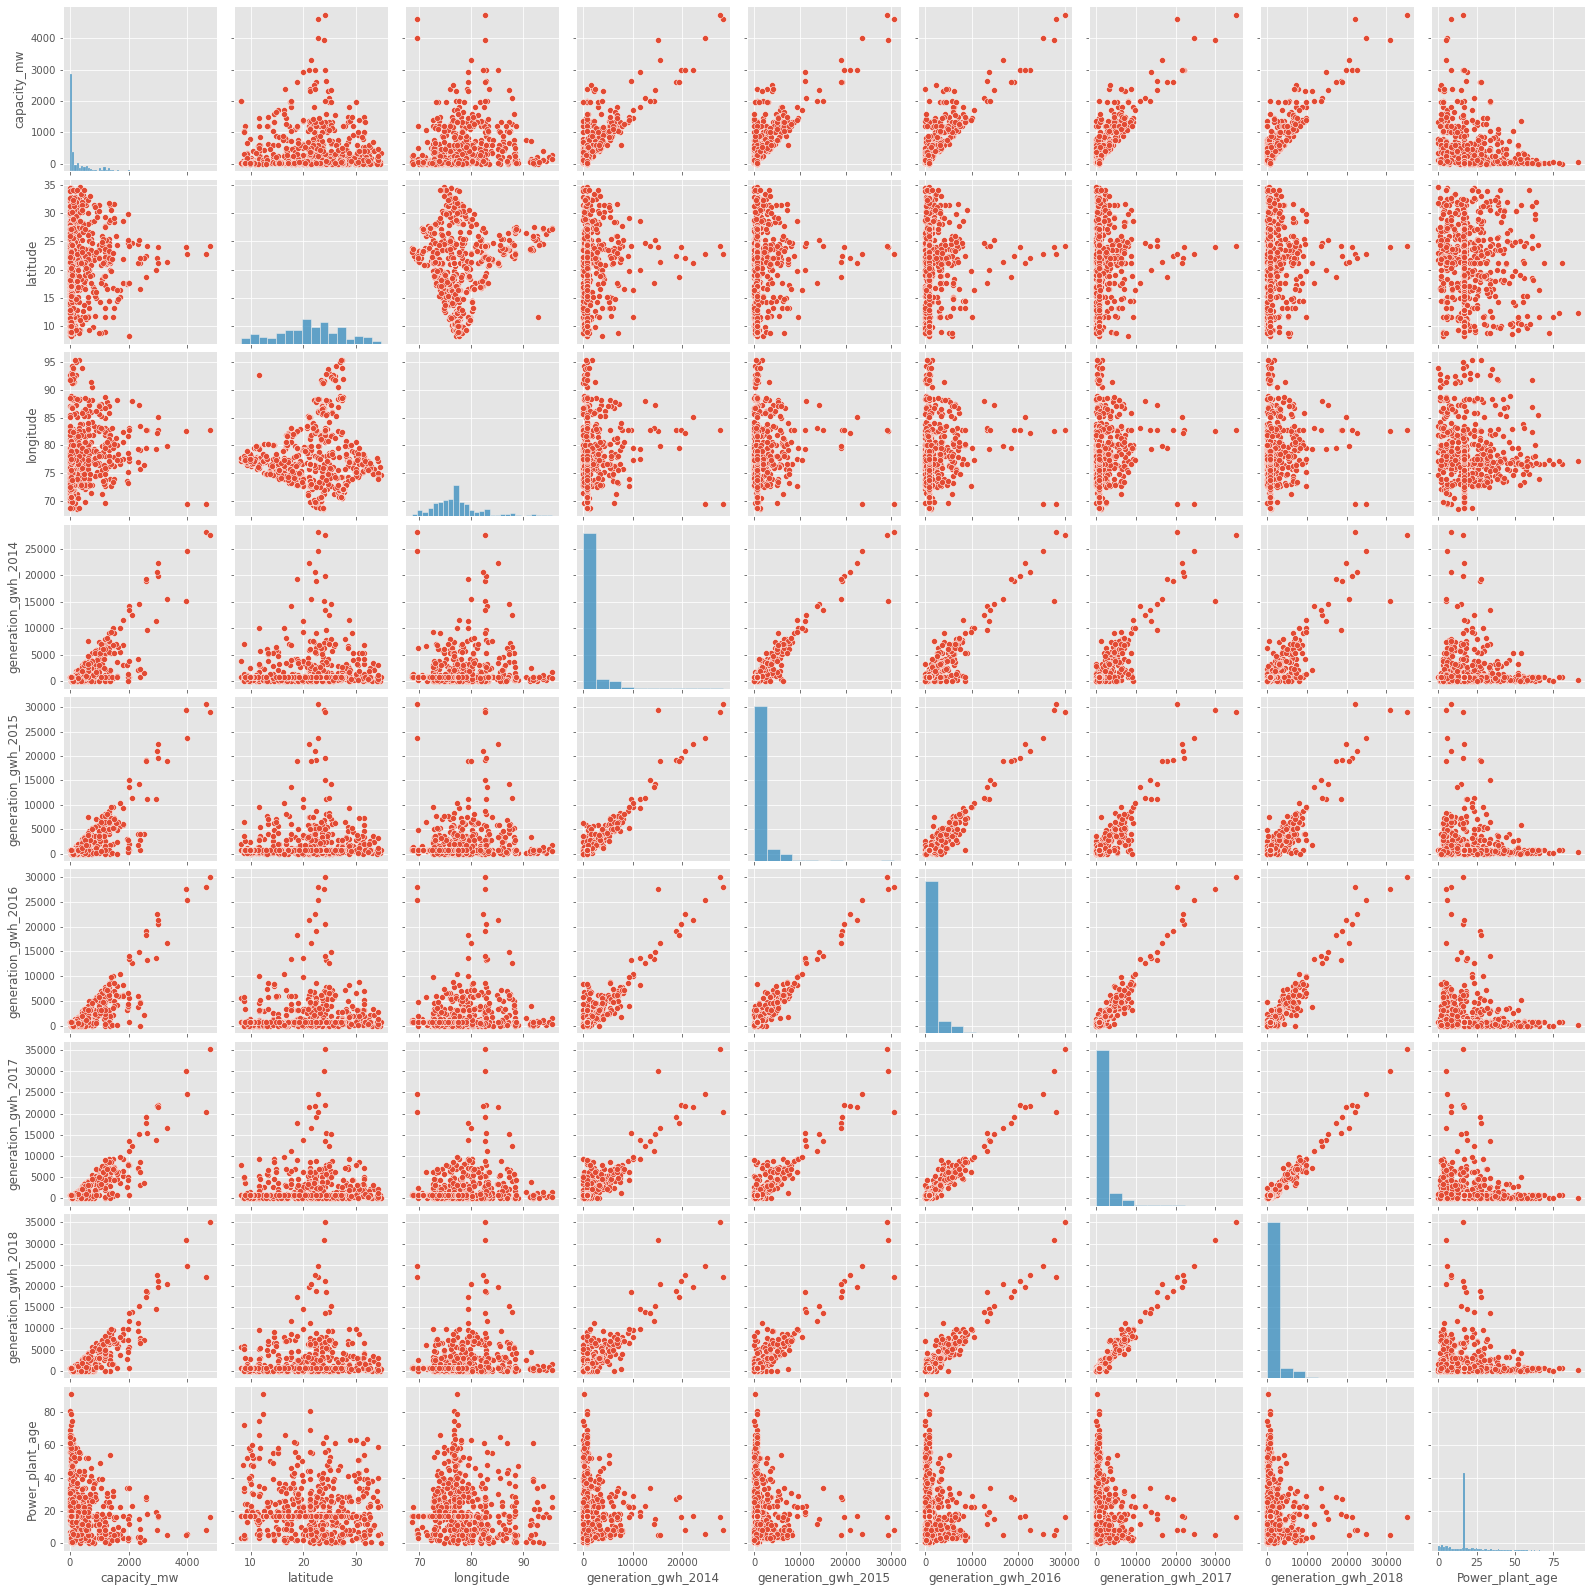

In [105]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

## Checking For Outlier

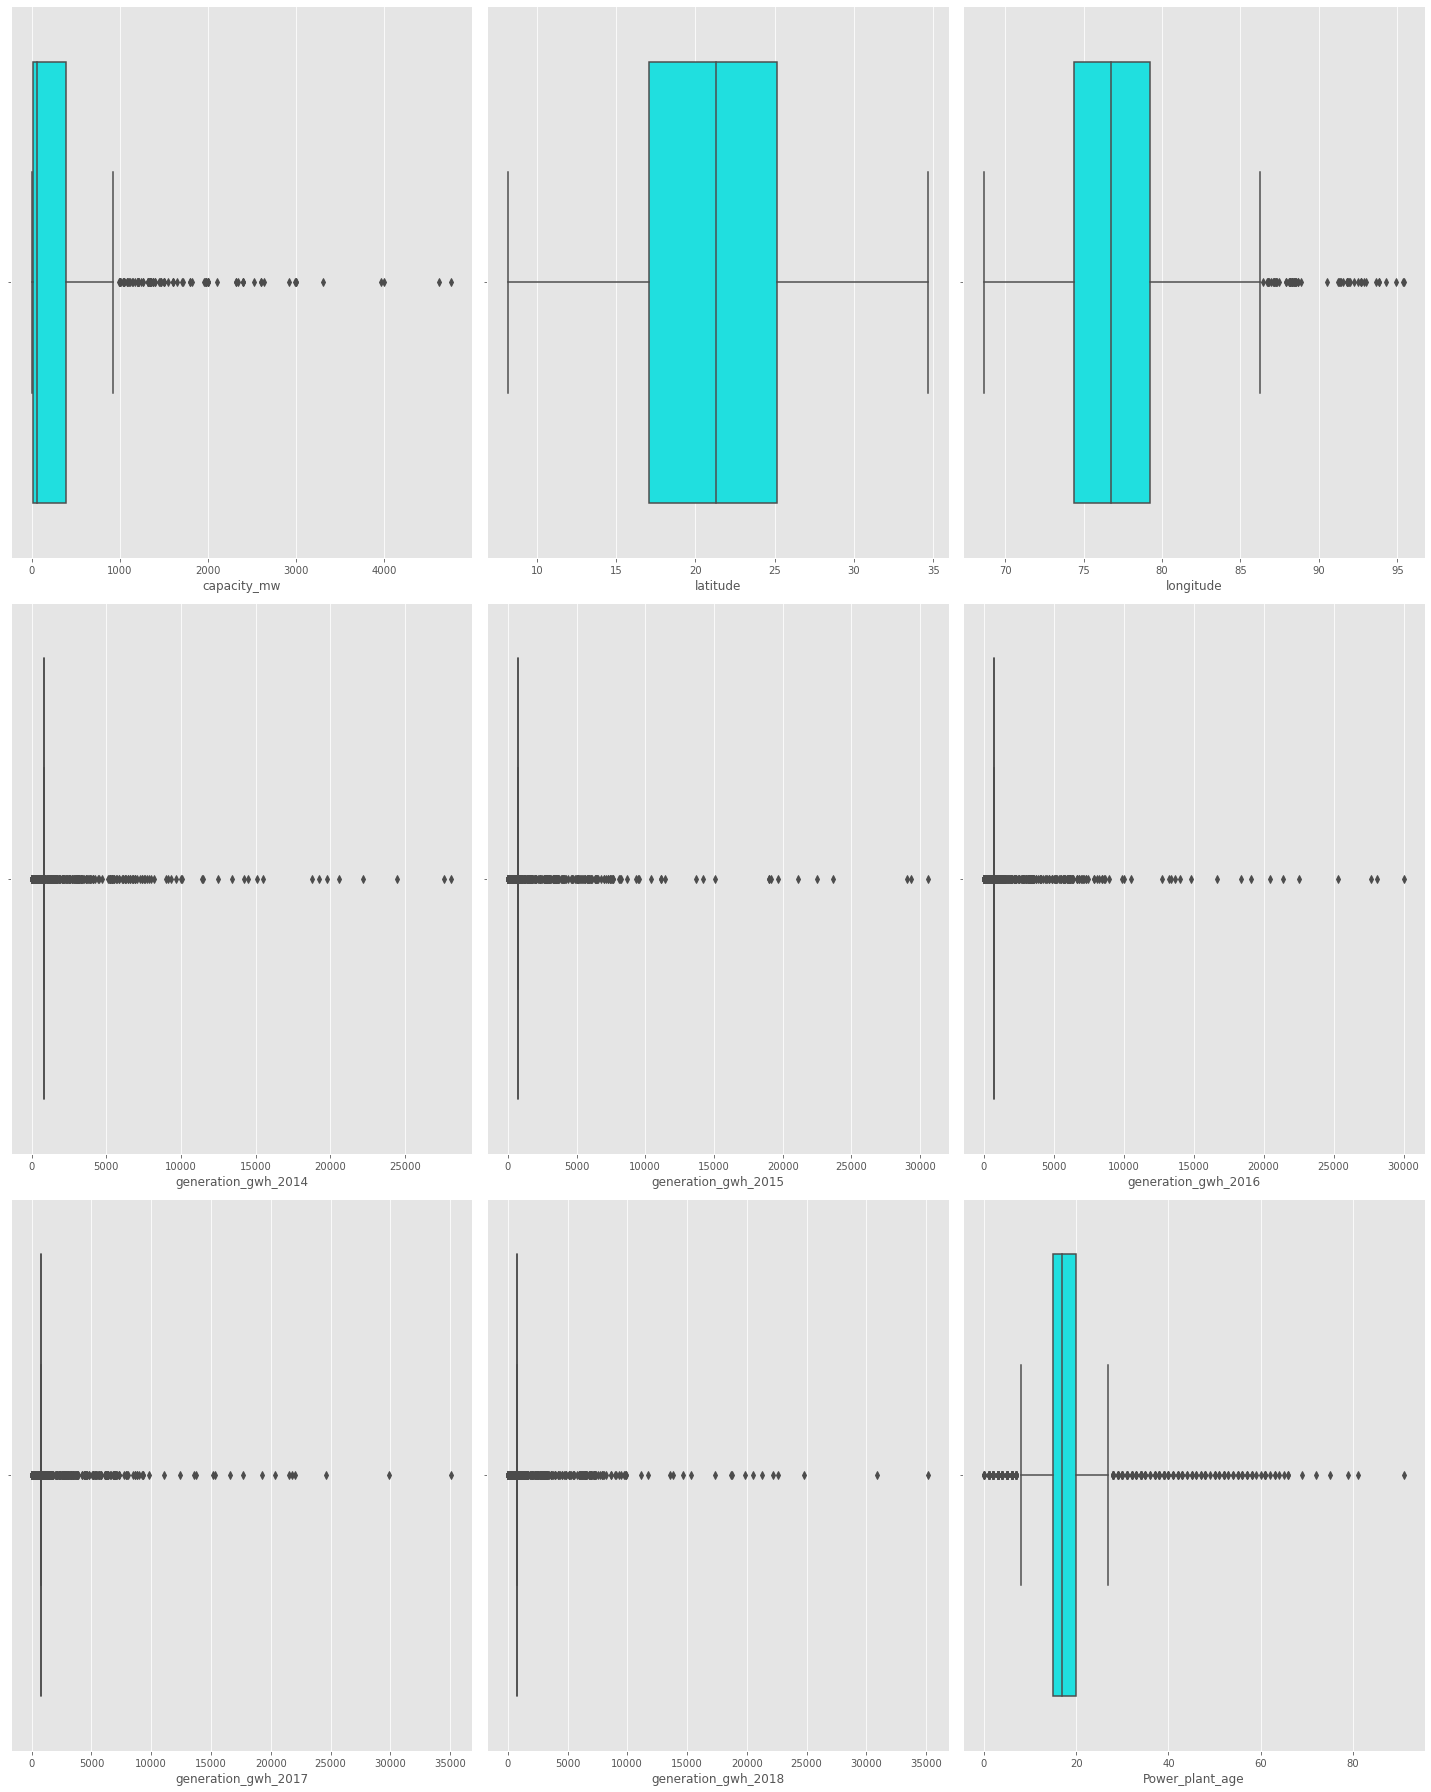

In [106]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## Removing outliers
#### Zscore method

In [107]:
# Features having outliers
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [108]:
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

In [109]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [110]:
# Checking the dimensions of both the dataframes
print(df.shape)
print(new_df.shape)

(907, 13)
(851, 13)


In [112]:
#Checking data loss
loss = (907-852)/908*100
loss

6.057268722466961

Using zscore method, the data loss is 6.05%. Lets check using IQR.

### IQR(Inter Qunatile Range) method

In [113]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd quantile
Q3 = features.quantile(0.75)

# IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [114]:
# Checking the dimensions of dataframes
print(df.shape)
print(df1.shape)

(907, 13)
(420, 13)


In [115]:
#Data loss using IQR
loss = (908-422)/908*100
loss

53.524229074889874

While Using IQR method,the data loss is more i.e 53%. So we will consider Zscore method.

### Encoding the categorical columns using Label Encoding

In [117]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']

In [118]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [119]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


This is the dataframe after encoding the categorical columns 

### Correlation

In [120]:
# Checking the correlation between features and label
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


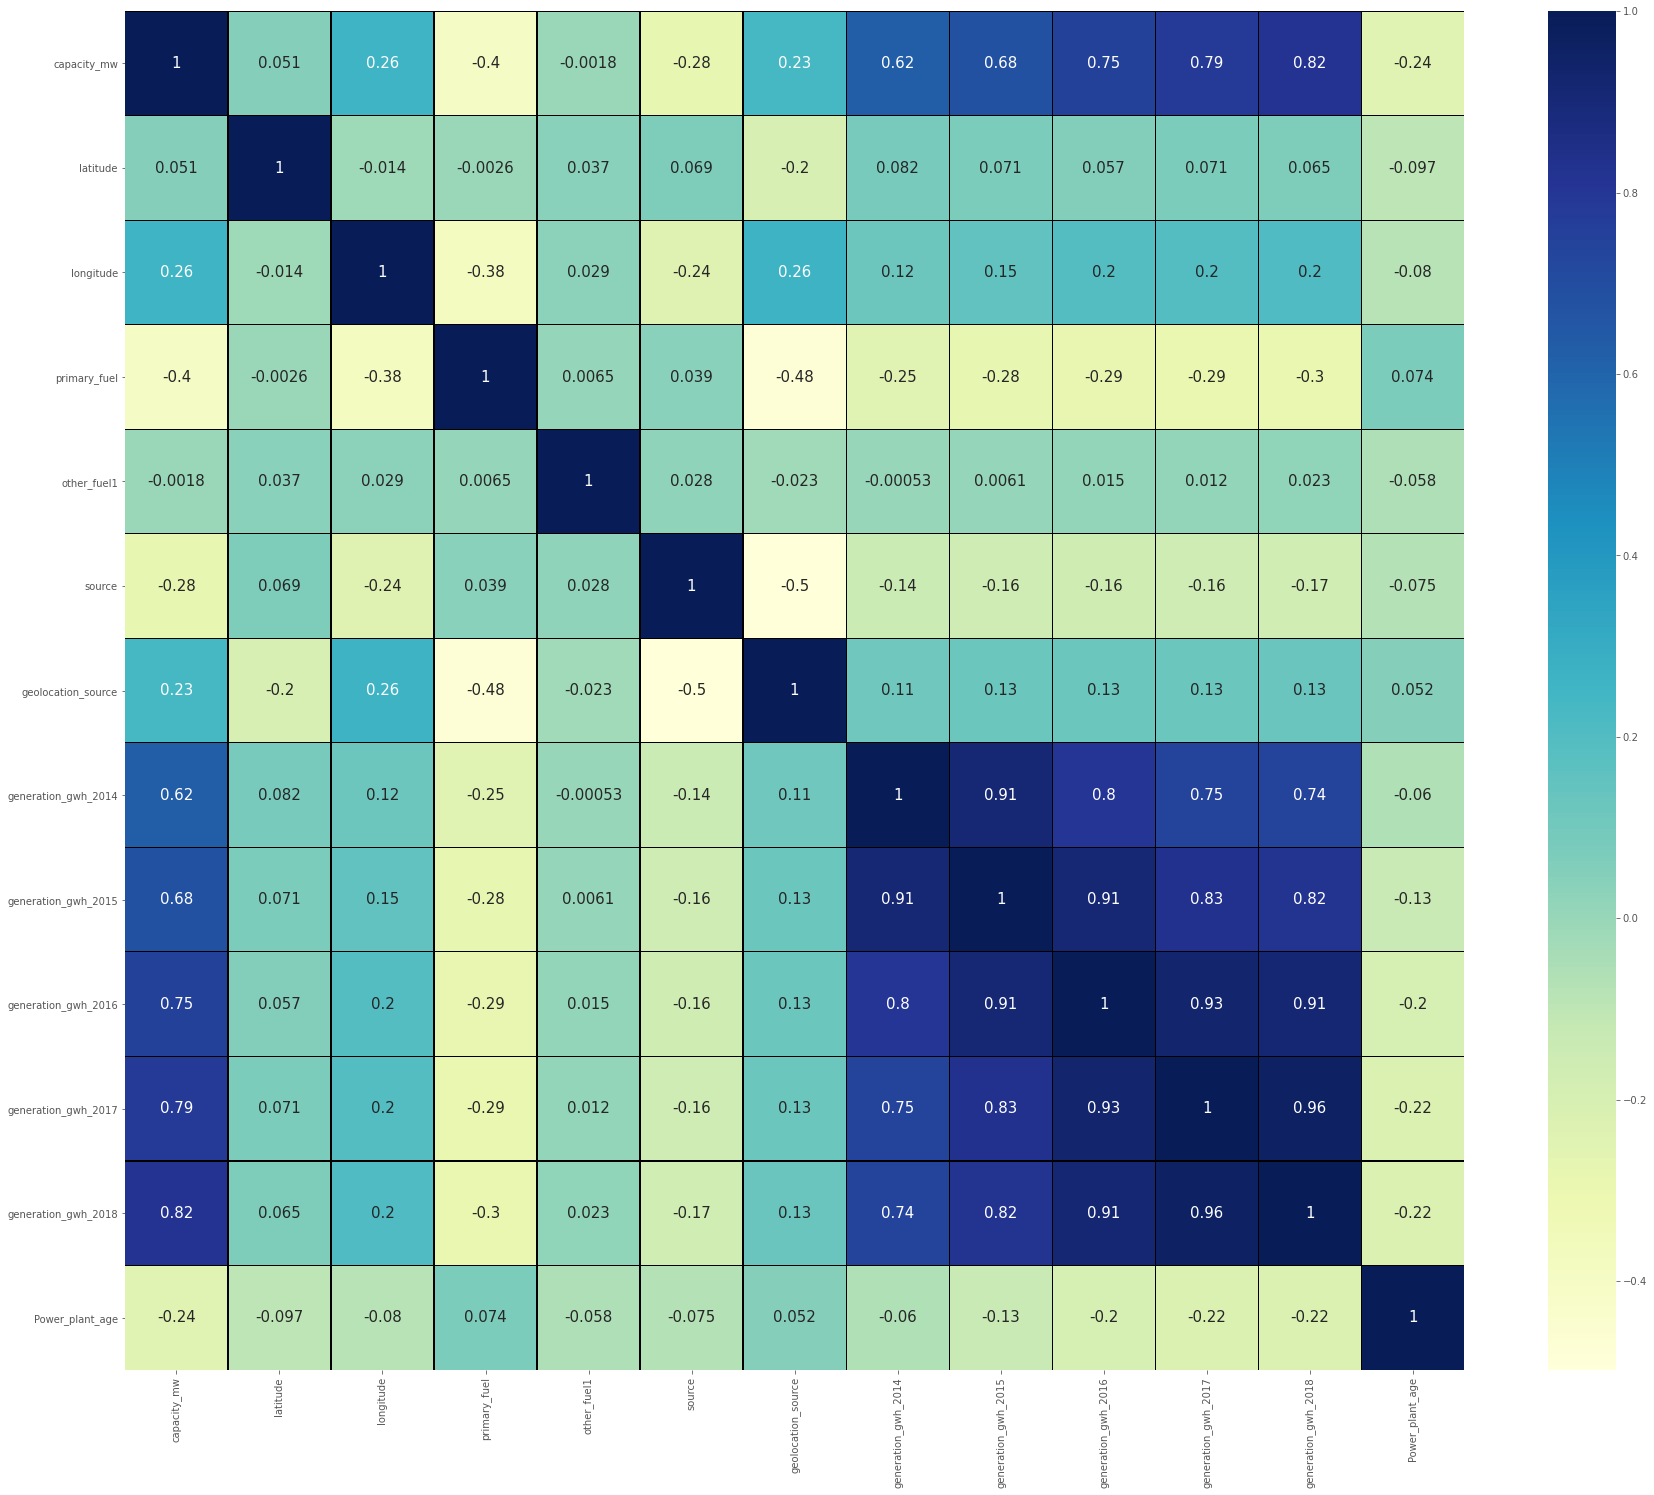

In [121]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True,linecolor='black',fmt='.2g',annot_kws={'size':15},cmap="YlGnBu")
plt.show()

#### Correlation between capacity_mw and features.

1)The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014.

2)And the label is negatively correlated with the features primary_fuel, source and Powe_plant_age.

3)The columns other_fuel1 and latitude have no relation with the label, so we can drop them.


#### Coorelation between primary_fuel and features

1)The label primary_fuel is less correlated with Power_plant_age and source.

2)The label is negatively correlated with geological_source, longitude,capacity_mw, and all generation_gwh years.

3)Also the features other_fuel1 and latitude have very less correlation with both the lables. We can drop these columns.

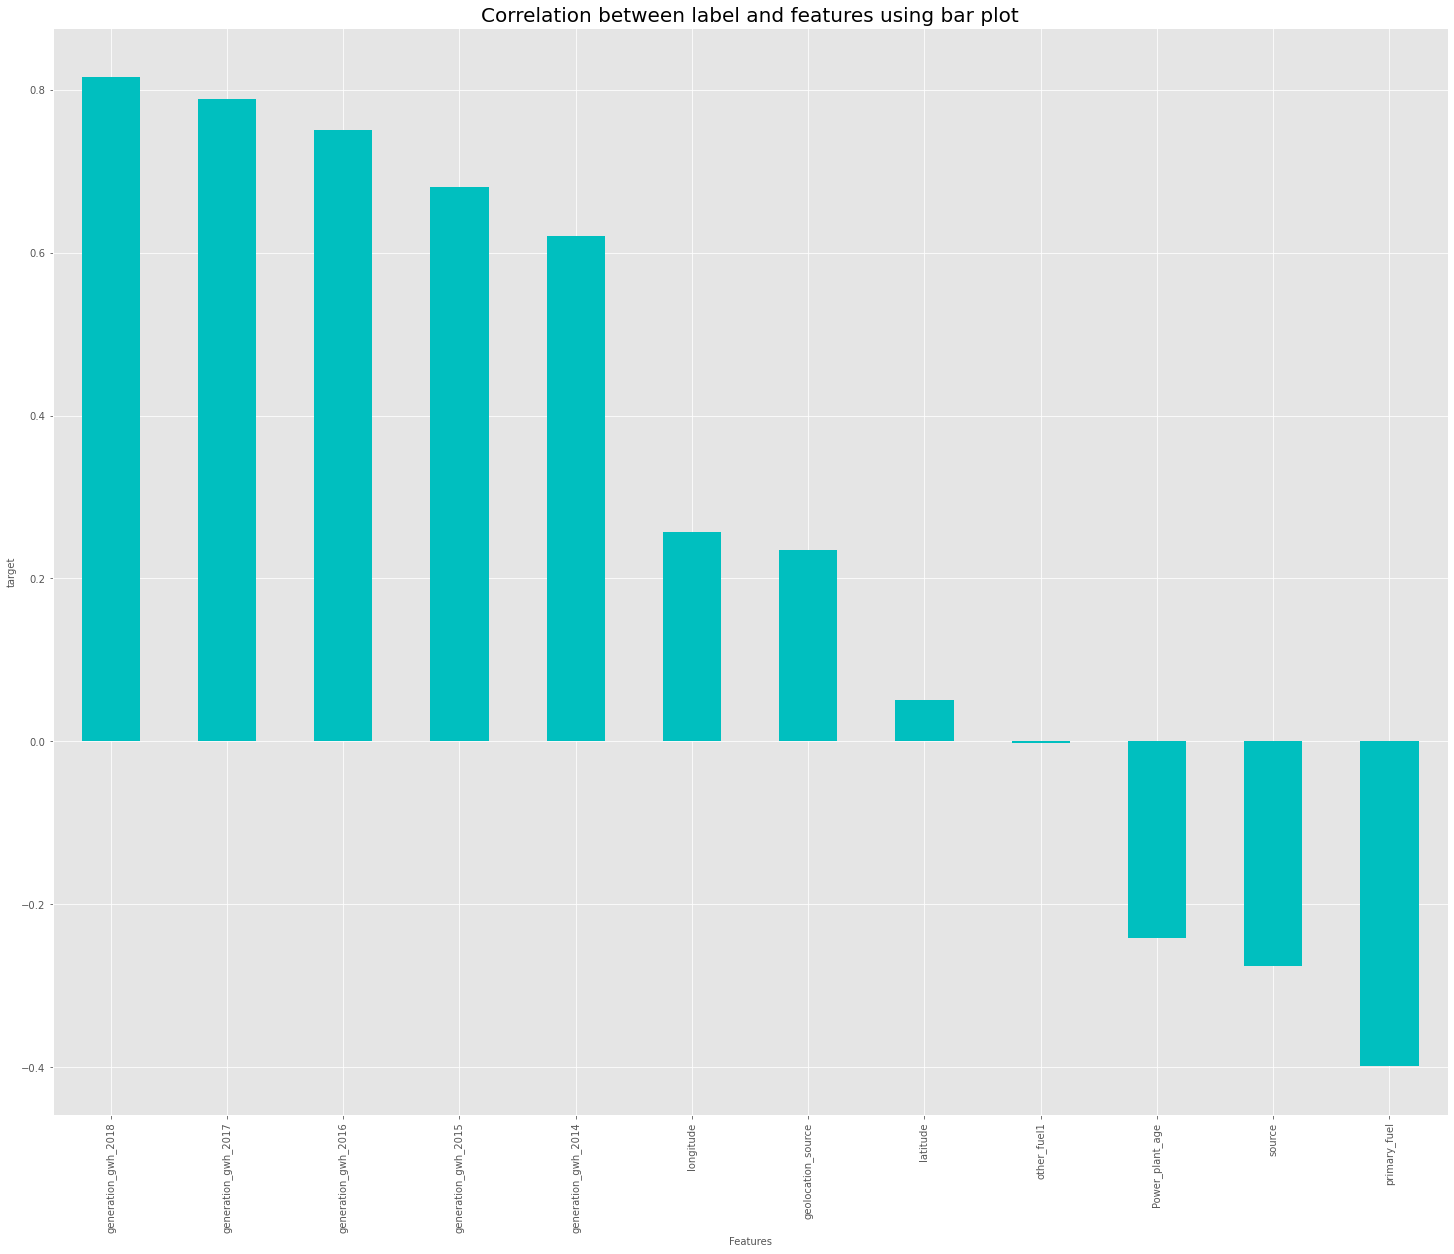

In [122]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(25,20))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

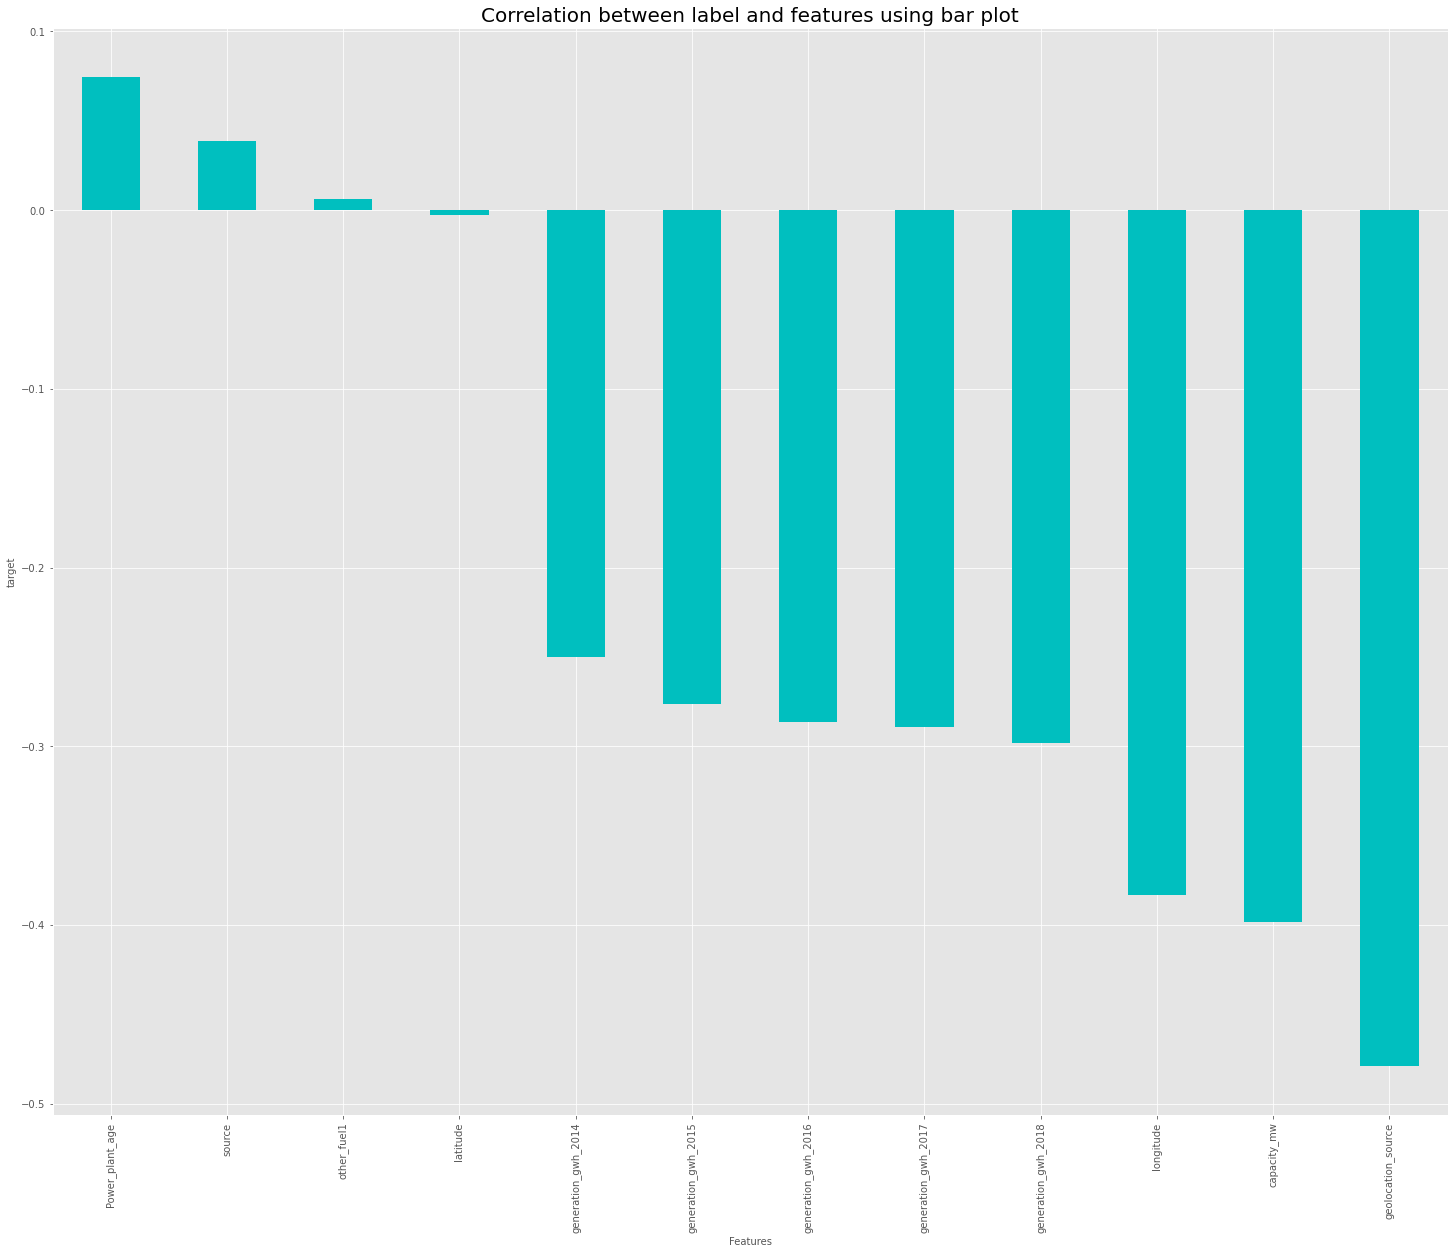

In [123]:
#Visualizing the correlation between the label (primary_fuel) and features using bar plot.
plt.figure(figsize=(25,20))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

In [124]:
# Dropping irrelavant columns
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# 1. Prediction for capacity_mw

In [125]:
#Separating the features and label
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [126]:
x.shape

(851, 10)

In [127]:
y.shape

(851,)

In [128]:
# Checking for skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [130]:
#Removing skewness using yeo-johnson method
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [131]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [132]:
# checking skewness after using yeo-johnson
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

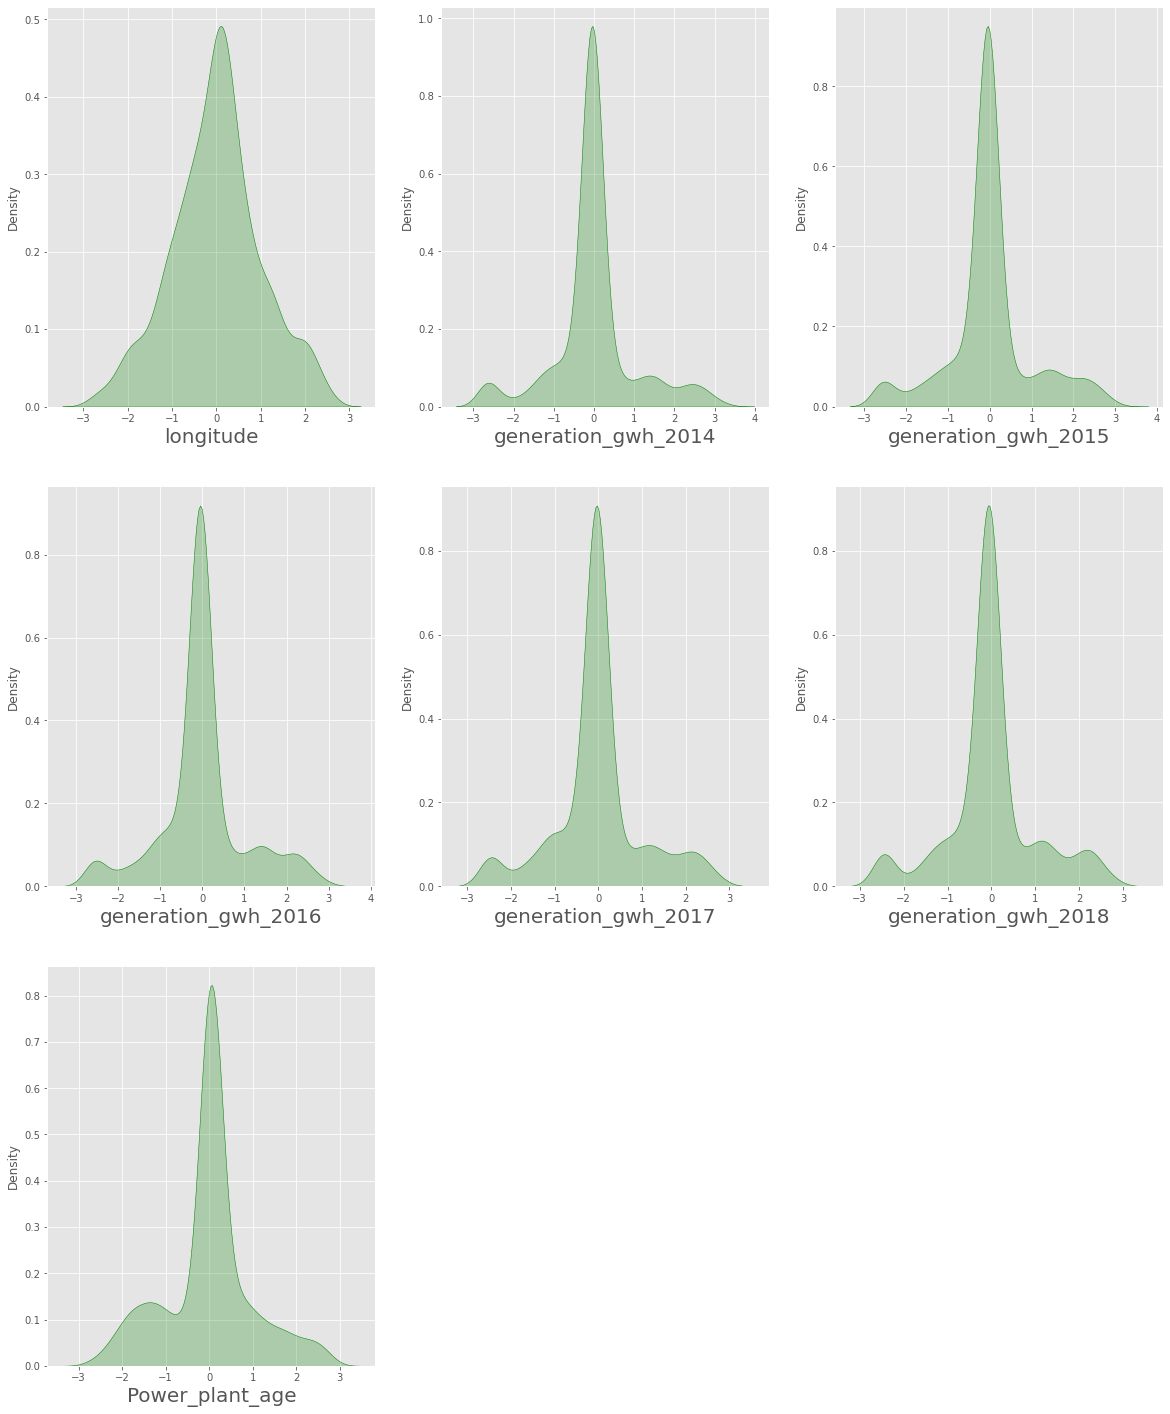

In [133]:
# Checking distribution after removing skewness
plt.figure(figsize=(20,25))
plotnumber=1
for col in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[col],color='g',kde_kws={"shade":True},hist=False)
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [134]:
#Feature Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [135]:
#Checking for MultiColinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,primary_fuel
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


# Model Building

In [137]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [138]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8608740309889463 at Random_state 185


In [139]:
#Creating new train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [140]:
# Regression Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

## RandomForestRegressor

In [141]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))


R2_Score: 0.8700649247032828
MAE: 80.73741678900471
MSE: 24548.006074086406
RMSE: 156.6780331574481


## DecisionTreeRegressor

In [142]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.6491922682480692
MAE: 118.766974609375
MSE: 66276.4100472295
RMSE: 257.4420518237638


## Knn

In [143]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE:",metrics.mean_absolute_error(y_test,predknn))
print("MSE:",metrics.mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.7919414566037032
MAE: 103.3725234375
MSE: 39307.49549645969
RMSE: 198.2611800037004


## GradientBoostingRegressor

In [144]:
# Checking R2 score for KNN Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))

R2_Score: 0.8499326878989574
MAE: 89.97564521918511
MSE: 28351.49231695782


## BaggingRegressor

In [145]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8531999705212695
MAE: 85.31422333484912
MSE: 27734.220394998956
RMSE: 166.53594325249716


In [146]:
#Checking the cross validation score
from sklearn.model_selection import cross_val_score

In [147]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7851223767776798


In [148]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5838334391727666


In [149]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7246064724376091


In [150]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7519879398195962


In [151]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7595592367499068


From the above observation, the difference between R2score and the cross validation score we conclude that RandomForestRegressor as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

### Hyper parameter tuning

In [152]:

from sklearn.model_selection import GridSearchCV

In [153]:
# RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [154]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [155]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [156]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [157]:
capacity = RandomForestRegressor(criterion='mae', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 156.6780331574481
R2_Score: 87.94319966593169


## Saving the model

In [158]:

import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [159]:
capacity = joblib.load("Global_Power_Plant_capacity_mw.pkl")

In [160]:

a = np.array(y_test)
predicted = np.array(capacity.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,20.00,22.871000
1,9.90,20.423625
2,75.00,101.843505
3,25.00,310.726620
4,300.00,356.947775
...,...,...
251,20.00,22.890000
252,56.25,20.717250
253,45.00,90.883375
254,100.80,20.717250


# 2. Prediction for primary_fuel

In [161]:
#Separating features and labels
x_df = new_df.drop("primary_fuel",axis=1)
y_df = new_df["primary_fuel"]

In [162]:
x_df.shape

(851, 10)

In [163]:
y_df.shape

(851,)

In [164]:
#Checking for Skewness
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [165]:
#Removing Skewness
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [166]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [167]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

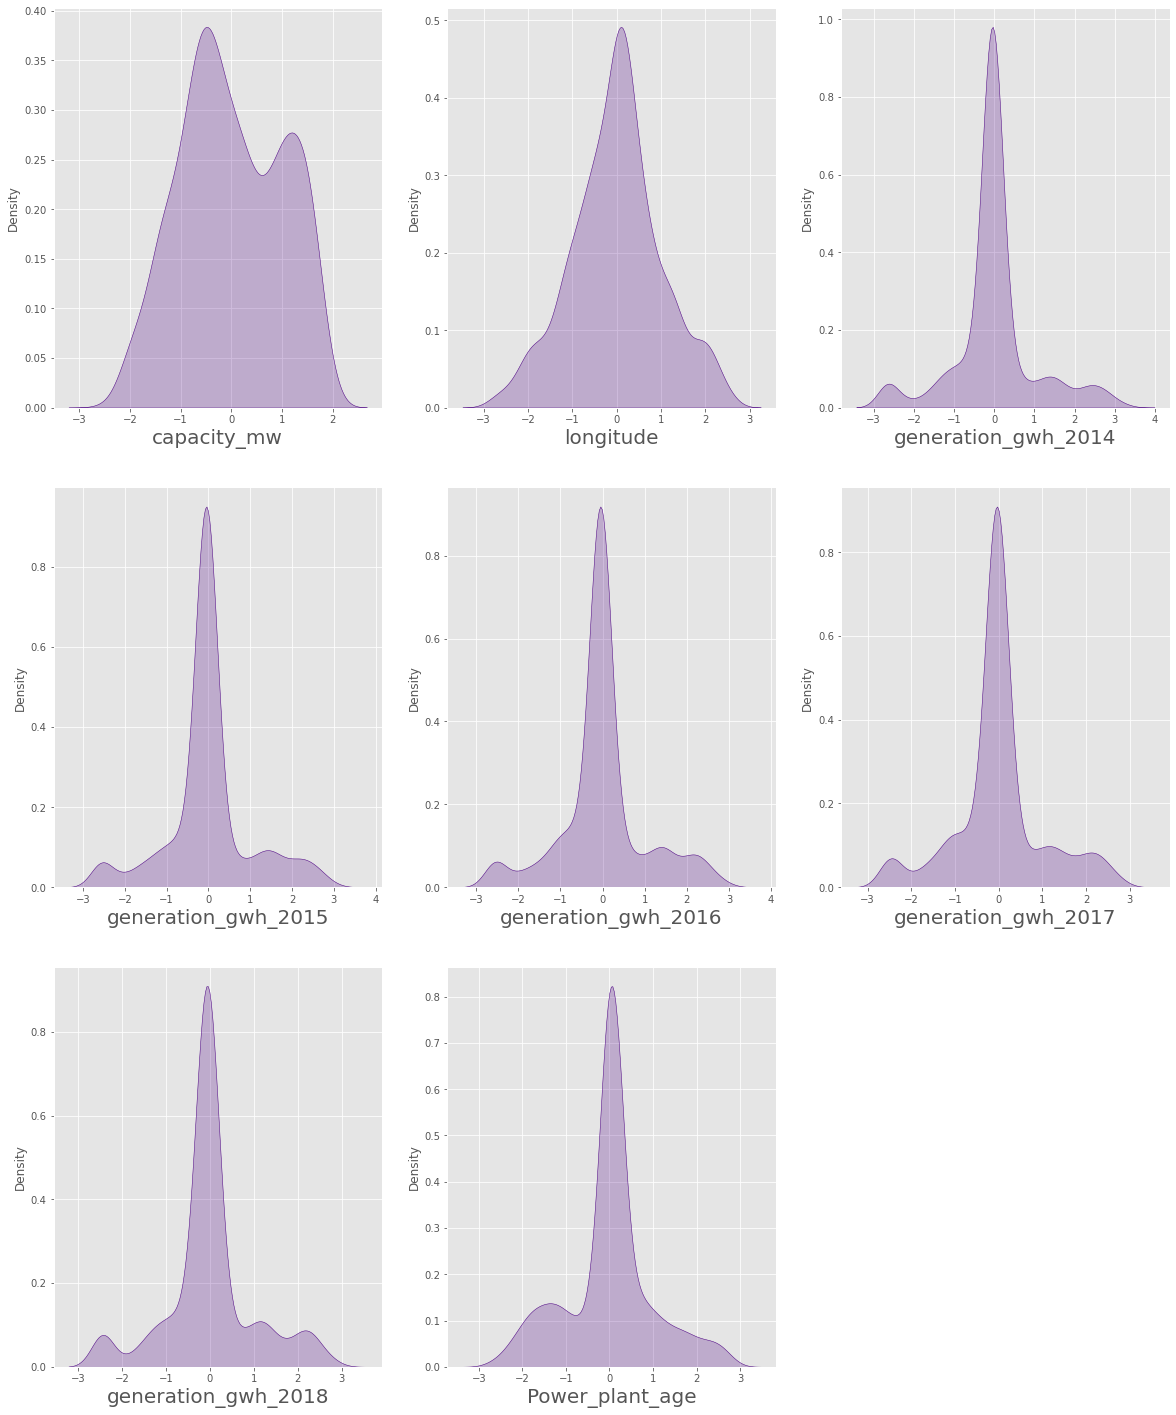

In [168]:
# Visualizing the distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [169]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df),columns = x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [170]:
#We have scaled the data using Standard Scalarization to overcome the issue of Data biasness.

# Checking Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


In [171]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

### oversampling the data


In [172]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df,y_df = SM.fit_resample(x_df,y_df)

In [174]:
y_df.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: primary_fuel, dtype: int64

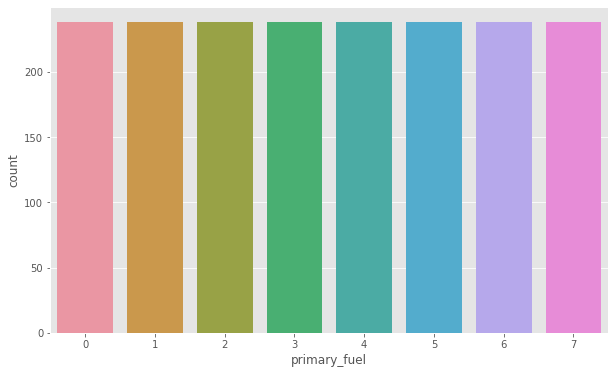

In [175]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [176]:
# DataFrame after preprocessing and data cleaning
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


## Model Building

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc = accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9073426573426573 at random_state 90


In [179]:
#Creating train_test_split
x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=maxRS)

In [180]:
#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

## DecisionTreeClassifier

In [181]:
# Checking Accuracy for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)
predDTC = DTC.predict(x_df_test)
print(accuracy_score(y_df_test,predDTC))
print(confusion_matrix(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))

0.9020979020979021
[[68  1  1  0  0  0  0  0]
 [ 2 52  8  6  5  1  0  0]
 [ 0  1 55  5  0  5  0  1]
 [ 0  5  4 63  0  0  0  0]
 [ 0  1  0  1 70  0  0  0]
 [ 1  3  3  1  1 61  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.83      0.70      0.76        74
           2       0.77      0.82      0.80        67
           3       0.83      0.88      0.85        72
           4       0.92      0.97      0.95        72
           5       0.91      0.87      0.89        70
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        81

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.90      0.90      0.90       572



## RandomForestClassifier

In [182]:
# Checking Accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)
predRFC = RFC.predict(x_df_test)
print(accuracy_score(y_df_test,predRFC))
print(confusion_matrix(y_df_test,predRFC))
print(classification_report(y_df_test,predRFC))

0.9370629370629371
[[70  0  0  0  0  0  0  0]
 [ 6 58  6  3  1  0  0  0]
 [ 0  4 60  0  0  3  0  0]
 [ 0  5  1 66  0  0  0  0]
 [ 0  1  0  0 71  0  0  0]
 [ 2  1  2  1  0 64  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        70
           1       0.84      0.78      0.81        74
           2       0.87      0.90      0.88        67
           3       0.94      0.92      0.93        72
           4       0.99      0.99      0.99        72
           5       0.96      0.91      0.93        70
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        81

    accuracy                           0.94       572
   macro avg       0.94      0.94      0.94       572
weighted avg       0.94      0.94      0.94       572



## SVC

In [183]:
# Checking Accuracy for SVC
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test,predsvc))
print(confusion_matrix(y_df_test,predsvc))
print(classification_report(y_df_test,predsvc))

0.8269230769230769
[[61  0  0  0  0  1  0  8]
 [14 39 12  2  3  0  0  4]
 [ 2  5 43  2  1 14  0  0]
 [ 0  7  6 50  1  0  0  8]
 [ 0  1  0  0 71  0  0  0]
 [ 1  0  0  0  0 64  0  5]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  2  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        70
           1       0.75      0.53      0.62        74
           2       0.68      0.64      0.66        67
           3       0.93      0.69      0.79        72
           4       0.93      0.99      0.96        72
           5       0.81      0.91      0.86        70
           6       1.00      1.00      1.00        66
           7       0.76      0.98      0.85        81

    accuracy                           0.83       572
   macro avg       0.83      0.83      0.82       572
weighted avg       0.83      0.83      0.82       572



## KNN

In [184]:
# Checking Accuracy for KNeighborsClassifier
knn = KNN()
knn.fit(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)
print(accuracy_score(y_df_test,predknn))
print(confusion_matrix(y_df_test,predknn))
print(classification_report(y_df_test,predknn))

0.8758741258741258
[[68  0  0  0  0  0  0  2]
 [12 40 10  6  3  0  0  3]
 [ 1  4 56  2  0  4  0  0]
 [ 1  5  6 56  0  0  0  4]
 [ 0  0  3  0 69  0  0  0]
 [ 2  0  3  0  0 65  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        70
           1       0.82      0.54      0.65        74
           2       0.72      0.84      0.77        67
           3       0.88      0.78      0.82        72
           4       0.96      0.96      0.96        72
           5       0.94      0.93      0.94        70
           6       1.00      1.00      1.00        66
           7       0.90      1.00      0.95        81

    accuracy                           0.88       572
   macro avg       0.88      0.88      0.87       572
weighted avg       0.88      0.88      0.87       572



## GradientBoostingClassifier

In [185]:
# Checking Accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)
predGB = GB.predict(x_df_test)
print(accuracy_score(y_df_test,predGB))
print(confusion_matrix(y_df_test,predGB))
print(classification_report(y_df_test,predGB))

0.9195804195804196
[[68  1  0  0  0  1  0  0]
 [ 6 56  6  6  0  0  0  0]
 [ 0  3 59  1  0  3  0  1]
 [ 0  5  2 65  0  0  0  0]
 [ 0  1  0  0 71  0  0  0]
 [ 1  1  7  1  0 60  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        70
           1       0.84      0.76      0.79        74
           2       0.80      0.88      0.84        67
           3       0.89      0.90      0.90        72
           4       1.00      0.99      0.99        72
           5       0.94      0.86      0.90        70
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        81

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.92      0.92      0.92       572



## BaggingClassifier

In [186]:
# Checking Accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)
predBC = BC.predict(x_df_test)
print(accuracy_score(y_df_test,predBC))
print(confusion_matrix(y_df_test,predBC))
print(classification_report(y_df_test,predBC))

0.9230769230769231
[[69  1  0  0  0  0  0  0]
 [ 4 56  8  3  3  0  0  0]
 [ 0  2 61  1  0  2  0  1]
 [ 0  6  5 61  0  0  0  0]
 [ 0  1  0  0 71  0  0  0]
 [ 2  1  3  1  0 63  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        70
           1       0.84      0.76      0.79        74
           2       0.79      0.91      0.85        67
           3       0.92      0.85      0.88        72
           4       0.96      0.99      0.97        72
           5       0.97      0.90      0.93        70
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        81

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.92      0.92      0.92       572



In [187]:
# Checking the cross Validation Score
from sklearn.model_selection import cross_val_score

In [188]:
# cv score for DecisionTreeClassifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.8771004282359443


In [189]:
# cv score for RandomForestClassifier
print(cross_val_score(RFC,x_df,y_df,cv=5).mean())

0.9154372150849565


In [190]:
# cv score for SVC
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.8035709352120458


In [191]:
# cv score for KNNClassifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.852945158171018


In [192]:
# cv score for GradientBoostingClassifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.9012626053322282


In [193]:
# cv score for BaggingClassifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.8949606299212599


## Hyper parameter tuning

In [196]:
from sklearn.model_selection import GridSearchCV
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse'],
             'max_features':[ 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6,8]}
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [197]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [198]:
primary_fuel = GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_df_train, y_df_train)
pred = primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

93.88111888111888


### Plotting ROC and compare AUC for the final model
Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

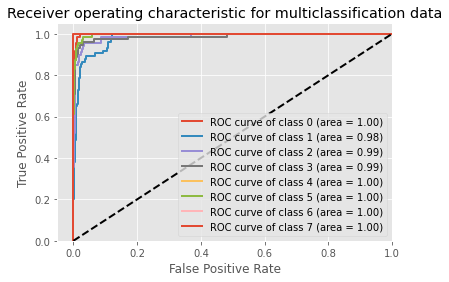

In [199]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

## Saving Model

In [200]:
# Saving the model using .pkl
import joblib
joblib.dump(primary_fuel,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

## Conclusion

The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 87.94%.

The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 93.88%.

In [201]:
model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [202]:
import numpy as np
a = np.array(y_df_test)
predicted = np.array(model.predict(x_df_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1,3
1,4,4
2,4,4
3,6,6
4,6,6
...,...,...
567,0,0
568,2,2
569,6,6
570,2,2


## Conclusion